# Group 10
## Part One

In [2]:
# Import the required libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

2023-02-12 16:14:00.534470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Write a Python program to load the iris data from a given csv file into a dataframe
# print the shape of the data
# type of the data and first 3 rows.
df = pd.read_csv("./iris.csv")
print(df.shape)
print([df[col].dtype for col in df.columns])
print(df.head(3))

(150, 6)
[dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O')]
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa


In [4]:
# Write a Python program using Scikit-learn to 
# print the keys, 
# number of rows-columns, 
# feature names 
# and the description of the Iris data.
iris = load_iris()
X = iris["data"]
y = iris["target"]

print(iris.keys())
print(X.shape)
print(y.shape)
print(iris.feature_names)
print(iris['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0 

In [5]:
# Write a Python program to get 
# the number of observations, 
# missing values, 
# and NaN values.
iris_df = pd.DataFrame(
    data=np.c_[X, y],
    columns=iris.feature_names + ['target']
)
print("Observations: ", iris_df.shape[0])
print("Missing Values: ", iris_df.isna().values.sum())
print("Nan values: ", iris_df.isnull().values.sum())


Observations:  150
Missing Values:  0
Nan values:  0


In [6]:
# Write a Python program to create a 2-D array with ones on the diagonal and zeros elsewhere. 
# Convert the NumPy array to a SciPy sparse matrix in CSR format.
from scipy.sparse import csr_matrix

diagnal_matrix = np.diag(np.ones(10))
data = []
indices = []
indptr = [0]
for i, row in enumerate(diagnal_matrix):
  count = 0
  for j, ele in enumerate(row):
    if ele != 0:
      data.append(ele)
      indices.append(j)
      count = count + 1
  indptr.append(indptr[i-1] + count)

print("manual extraction into csr format")
print("data: ", data)
print("indices: ", indices)
print("indptr: ", indptr)    

print("CSR Matrix Format")
print(csr_matrix(diagnal_matrix))

manual extraction into csr format
data:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
indices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
indptr:  [0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
CSR Matrix Format
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0


In [7]:
# Write a Python program to view basic statistical details like percentile, mean, std etc. of iris data.
print(iris_df.describe(percentiles=[0.50]))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
50%             5.800000          3.000000           4.350000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
50%            1.300000    1.000000  
max            2.500000    2.000000  


In [8]:
# Write a Python program to get observations of each species (setosa, versicolor, virginica) from iris data.
# print(iris.target_names)
print("Observation of each species:")
species_df = {}
for i, target_name in enumerate(iris.target_names):
  species_df[target_name] = iris_df[iris_df.target == i]
  print("-", target_name, species_df[target_name].shape)



Observation of each species:
- setosa (50, 5)
- versicolor (50, 5)
- virginica (50, 5)


In [9]:
# Write a Python program to drop the Id column from a given dataframe 
# and print the modified part. 
# Call the iris.csv file to create the dataframe.

df_no_index = pd.read_csv("./iris.csv")
df_no_index = df_no_index.drop(['Id'], axis=1)

print(df_no_index)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [10]:
# Write a Python program to access the first four cells from a given dataframe using the index and column labels. 
# Call the iris.csv file to create the dataframe.
print(df.loc[0, 'SepalLengthCm'])
print(df.loc[0, 'SepalWidthCm'])
print(df.loc[0, 'PetalLengthCm'])
print(df.loc[0, 'PetalWidthCm'])

5.1
3.5
1.4
0.2


## Part Two

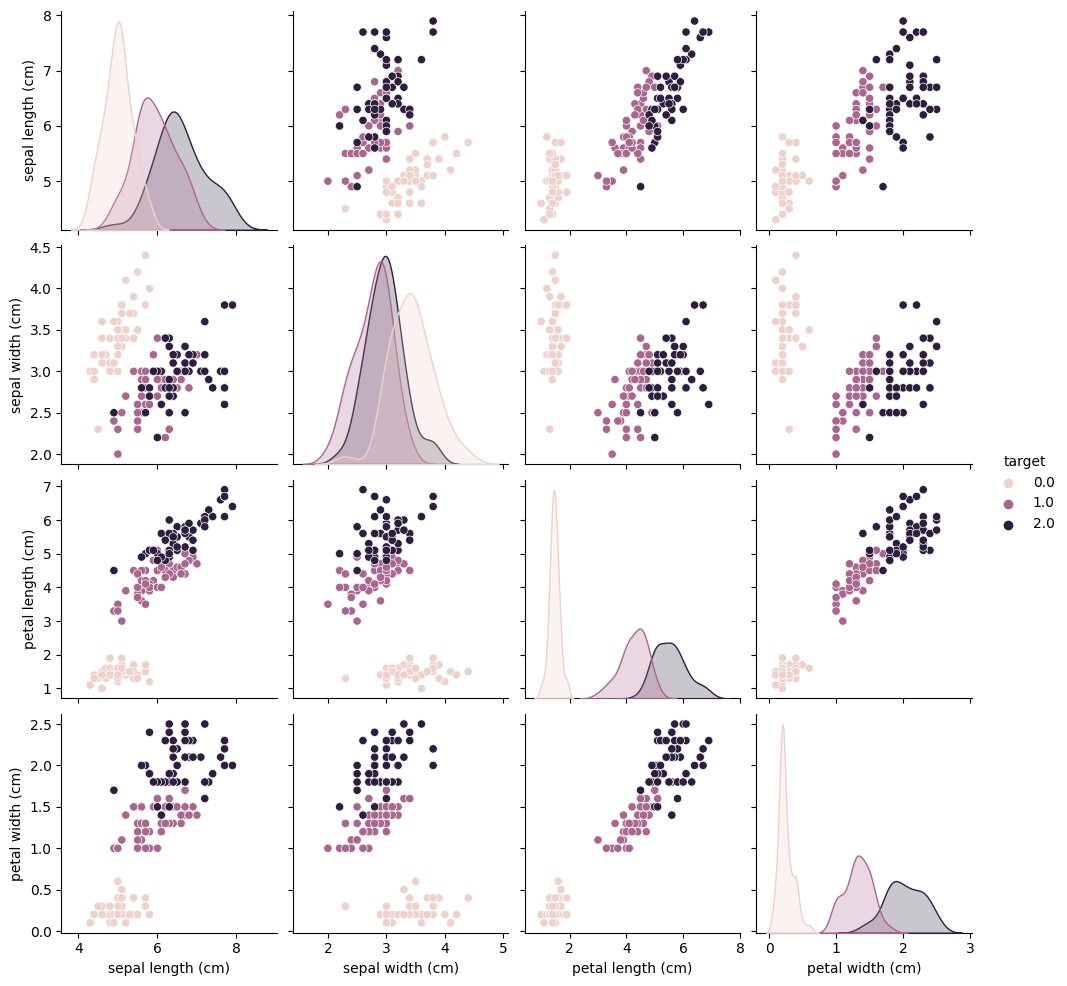

In [11]:
# Create a plot to get a general statistics of the Iris data
import seaborn as sns
sns.pairplot(iris_df, hue='target')

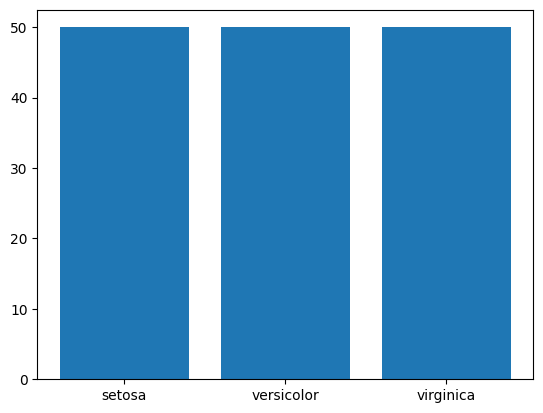

In [12]:
# Create a bar plot to get the frequency of the three species of the Iris data
from matplotlib import pyplot as plt

counts = iris_df["target"].value_counts()
plt.bar(list(species_df.keys()), counts)
plt.show()

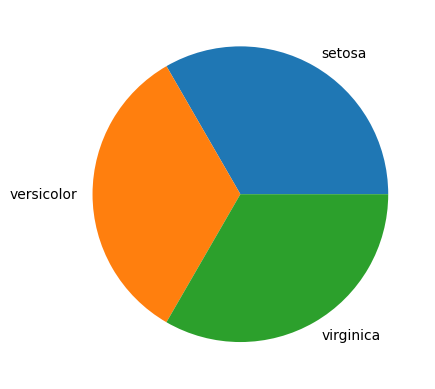

In [13]:
# Create a pie plot to get the frequency of the three species of the Iris data
plt.pie(counts, labels=list(species_df.keys()))
plt.show()

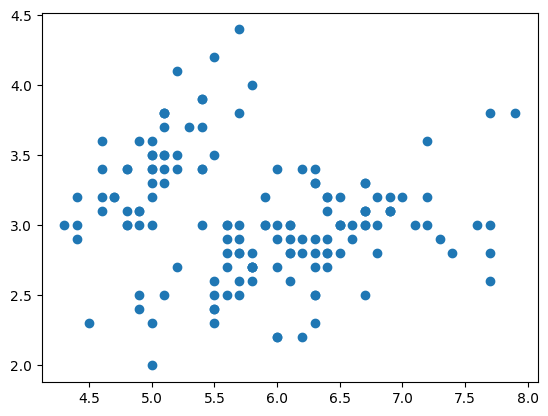

In [14]:
# Create a graph to find the relationship between the sepal length and width

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.show()

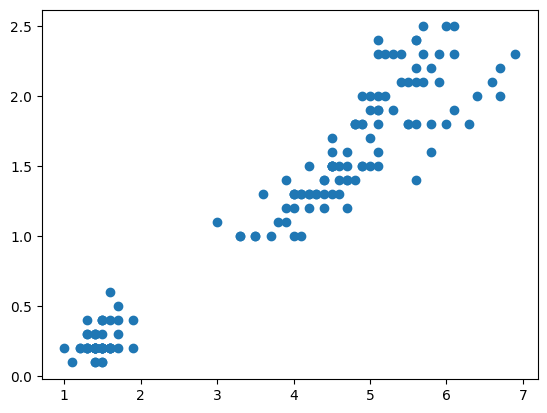

In [15]:
# Create a graph to find the relationship between the petal length and width

plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.show()

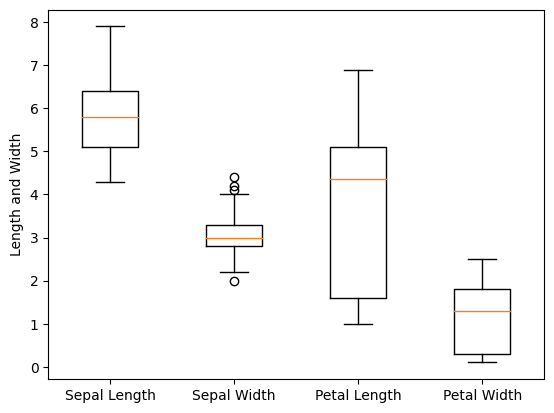

In [16]:
# Create a graph to see how the length and width of SepalLength, SepalWidth, PetalLength, and PetalWidth are distributed.

plt.boxplot([iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'], iris_df['petal width (cm)']])
plt.xticks([1, 2, 3, 4], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.ylabel('Length and Width')
plt.show()

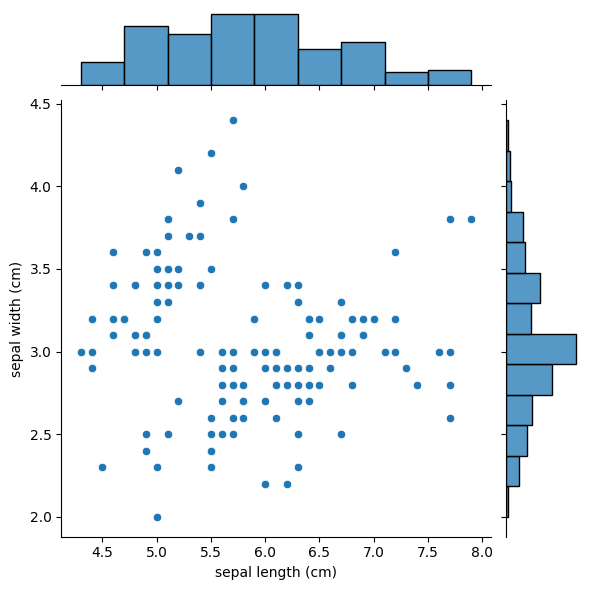

In [17]:
# Create a joinplot to describe individual distributions on the same plot between Sepal length and Sepal width.

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df)
plt.show()


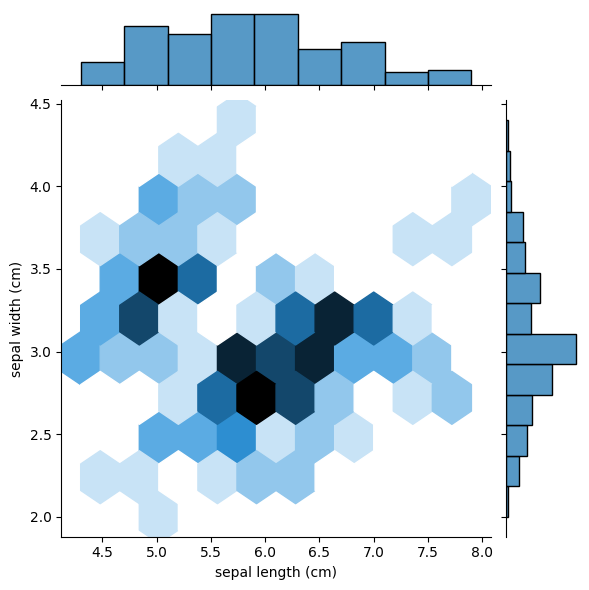

In [18]:
# Create a joinplot using "hexbin" to describe individual distributions on the same plot between Sepal length and Sepal width.

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", kind="hex", data=iris_df)
plt.show()

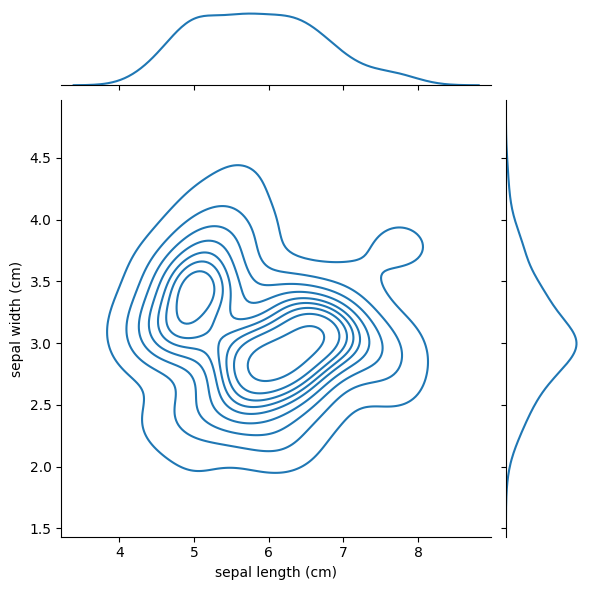

In [19]:
# Create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width.

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", kind="kde", data=iris_df)
plt.show()

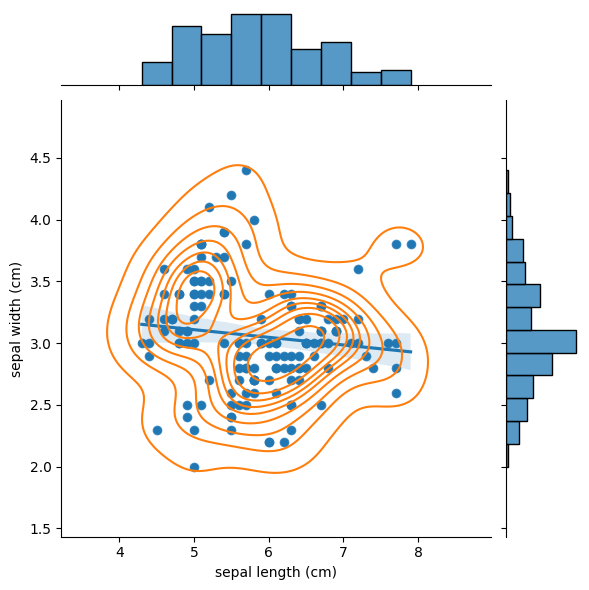

In [20]:
# Create a joinplot and add regression and kernel density fits using "reg" 
# to describe individual distributions on the same plot between Sepal length and Sepal width.

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df)
sns.regplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df)
sns.kdeplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df)
plt.show()

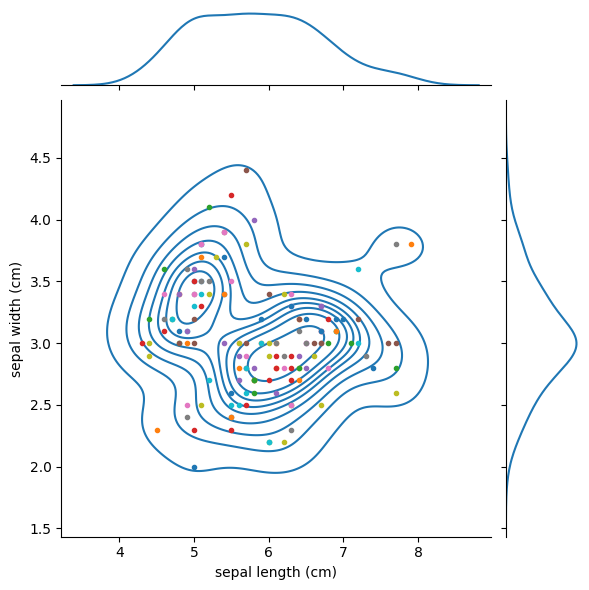

In [46]:
# Draw a scatterplot, then add a joint density estimate 
# to describe individual distributions on the same plot between Sepal length and Sepal width.

graph = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", kind="kde", data=iris_df)

for _, row in iris_df.iterrows():
  graph.ax_joint.plot(row["sepal length (cm)"], row["sepal width (cm)"], marker='.')

plt.show()


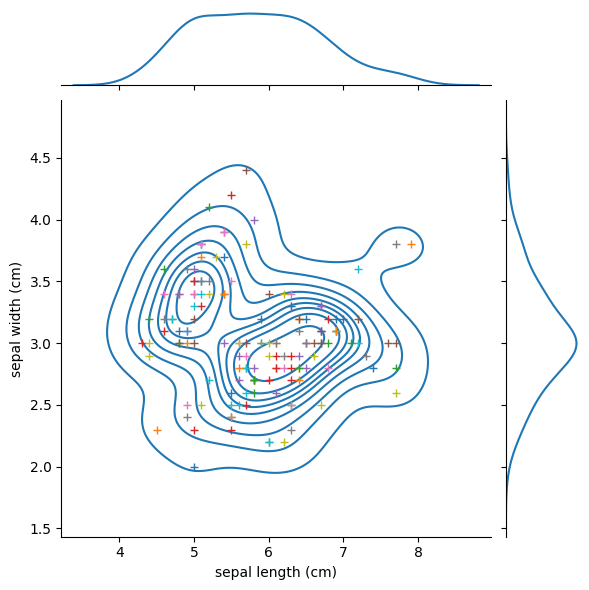

In [35]:
# Create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width 
# and use '+' sign as marker.

graph = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", kind="kde", data=iris_df)

markers = ['+']
for _, row in iris_df.iterrows():
  graph.ax_joint.plot(row["sepal length (cm)"], row["sepal width (cm)"], marker=markers[0])

plt.show()

setosa seems to be most seperatable


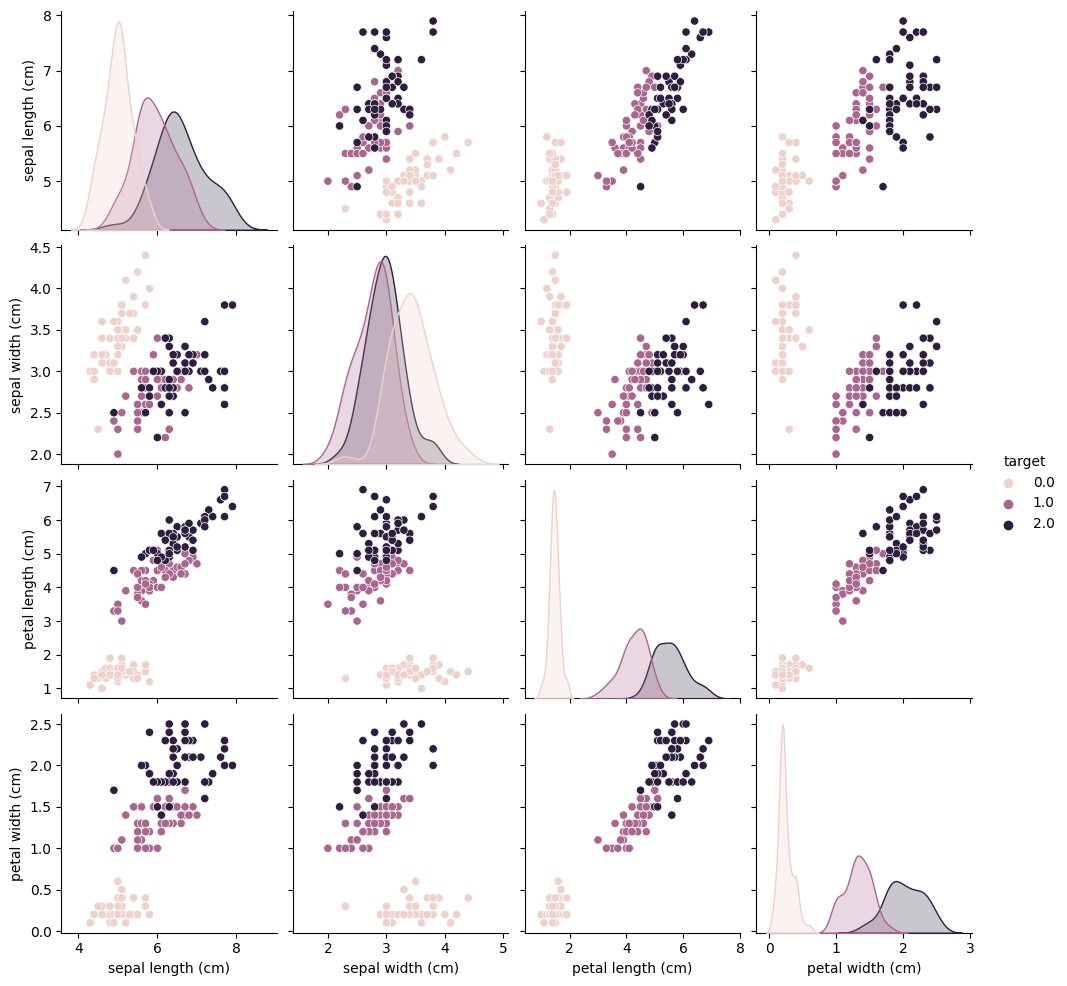

In [48]:
# Create a pairplot of the Iris data set and check which flower species seems to be the most separable.
sns.pairplot(iris_df, hue="target")
print("setosa seems to be most seperatable")

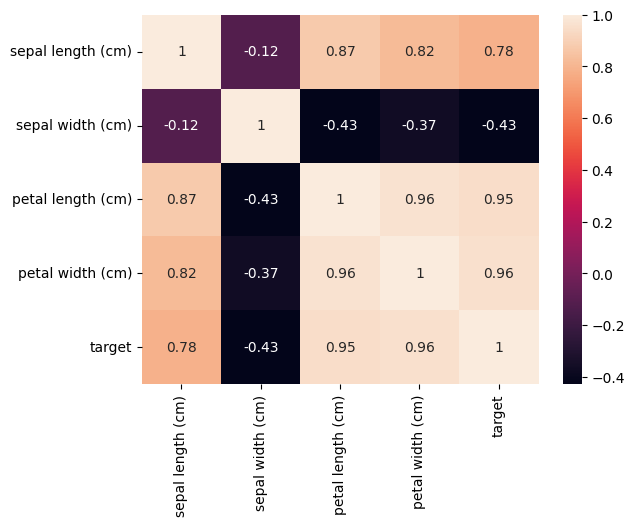

In [51]:
# Find the correlation between variables of the Iris data and create a heatmap using Seaborn to present their relations.
corr = iris_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

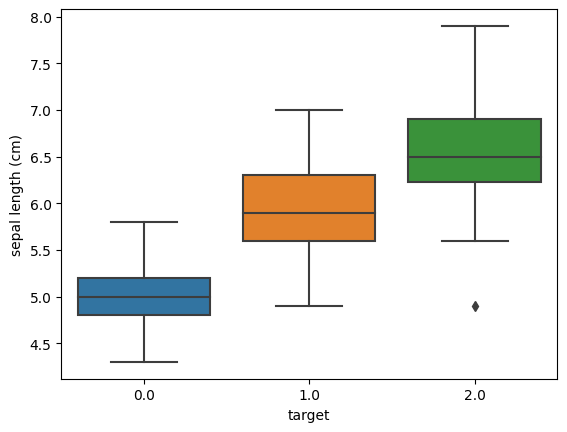

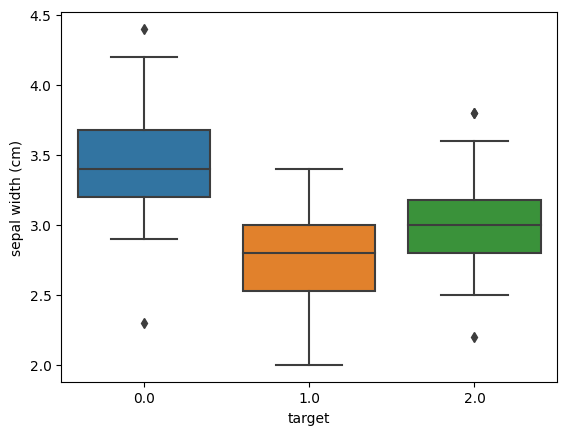

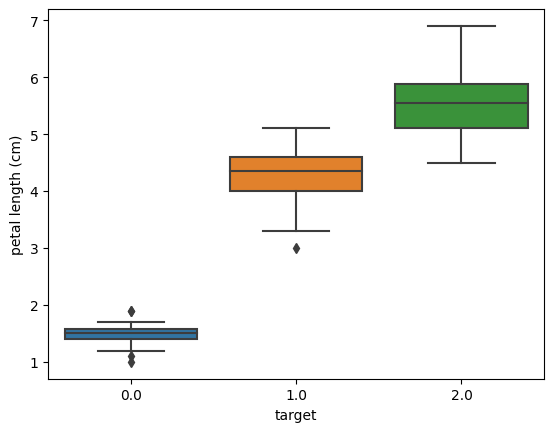

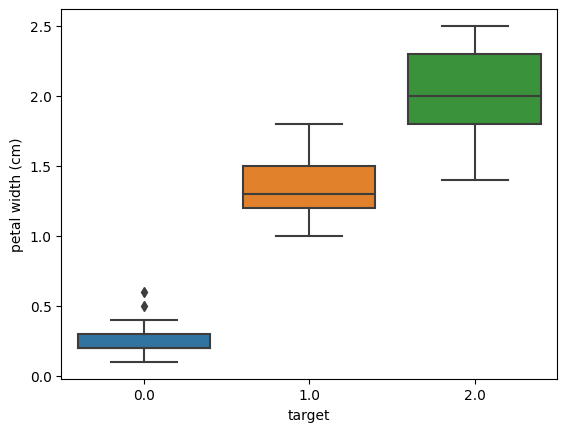

In [55]:
# Create a box plot (or box-and-whisker plot) which shows the distribution of quantitative data 
# in a way that facilitates comparisons between variables or across levels of a categorical variable of the Iris dataset using Seaborn.

plt.figure(0)
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.figure(1)
sns.boxplot(x='target', y='sepal width (cm)', data=iris_df)
plt.figure(2)
sns.boxplot(x='target', y='petal length (cm)', data=iris_df)
plt.figure(3)
sns.boxplot(x='target', y='petal width (cm)', data=iris_df)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


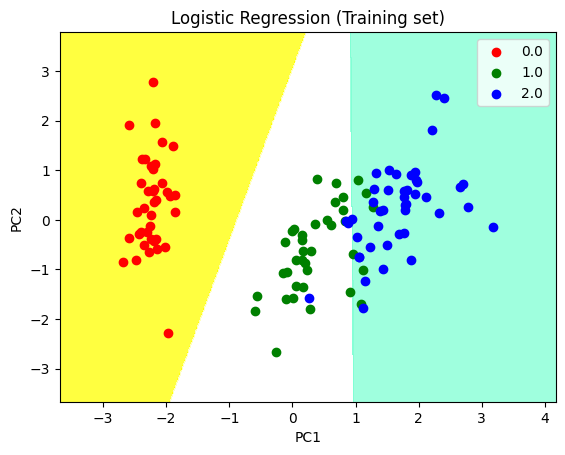

In [61]:
# Create a Principal Component Analysis (PCA) of the Iris dataset.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
  np.arange(start = X_set[:, 0].min() - 1,
  stop = X_set[:, 0].max() + 1, step = 0.01),
  np.arange(start = X_set[:, 1].min() - 1,
  stop = X_set[:, 1].max() + 1, step = 0.01)
)
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()